<a href="https://colab.research.google.com/github/0ROHAN0/CMPE255_HW/blob/main/HW_2_Part_2_PCA_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2 Part 2: PCA and Clustering on the Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided clean bank marketing dataset before encoding and scaling (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). Complete all the [LP] questions to receive a "low pass" grade on the homework. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

[LP 1] Import the provided clean data file, your preprocessed dataset from HW1, or clean the dataset here. Extract the following columns:

1. duration: all entries must be non-negative
2. campaign
3. pdays
4. previous

The set of values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices if you are preprocessing the dataset again here OR comment that you are using your preprocessed dataset from HW1. 

Next, remove outliers using [z-score](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html). Specifically, you are advised to remove values that have a z-score below -3 or above +3. 

In [497]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1

In [498]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
bank_ds = pd.read_csv('/content/bank_cleaned_dataset.csv')
bank_ds
# Here I have imported the previousely cleaned dataset from HW1 part2.

,Unnamed: 0,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,0,5,1,2,0,1,1,0,1,2,0,0.451613,0.024163,0.866667,0.065230,0.163265,0.000000,0.000000
1,1,5,1,2,0,0,0,0,1,2,0,0.370968,0.029542,0.833333,0.084741,0.306122,0.000000,0.000000
2,2,9,2,1,0,0,0,0,11,1,1,0.096774,0.032172,0.033333,0.143856,0.000000,0.222491,0.081081
3,3,4,0,1,0,0,0,1,3,2,0,0.483871,0.034101,0.266667,0.039313,0.081633,0.000000,0.000000
4,4,2,2,0,0,1,0,2,8,2,0,0.096774,0.025768,0.733333,0.105416,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2241,7,2,2,0,1,0,0,10,0,0,0.161290,0.034152,0.466667,0.059988,0.081633,0.332527,0.297297
2242,2242,10,0,1,0,0,0,0,1,2,0,0.580645,0.088455,0.333333,0.064648,0.000000,0.000000,0.000000
2243,2243,5,2,2,0,1,0,0,0,2,0,0.193548,0.029542,0.466667,0.086488,0.020408,0.000000,0.000000
2244,2244,3,1,1,0,0,0,0,9,2,0,0.483871,0.074879,0.533333,0.050961,0.000000,0.000000,0.000000


In [499]:
bank_ds.drop(['Unnamed: 0'],axis=1,inplace=True)
print("\n The mean of each colonn is as under:\n\n {}".format(bank_ds.mean()))
print("\n We now use this mean value to normalize the value of colons\n")


 The mean of each colonn is as under:

 job          5.340606
marital      1.173197
education    1.244880
default      0.020036
housing      0.571683
loan         0.167854
contact      0.650935
month        5.585931
poutcome     1.780944
y            0.114871
age          0.356196
balance      0.051856
day          0.488874
duration     0.108977
campaign     0.035978
pdays        0.050213
previous     0.015980
dtype: float64

 We now use this mean value to normalize the value of colons



In [500]:
# using StandardScaler() to scale the values of the colons; we get mean of 0 and the varience of 1.

scale = StandardScaler()      
scaled_data_ds = scale.fit_transform(bank_ds)

In [501]:
scaled_bank_ds = pd.DataFrame(scaled_data_ds,columns=bank_ds.columns)

In [502]:
print("The mean of each columns is as under")
scaled_bank_ds.mean()

The mean of each columns is as under


job         -2.530874e-17
marital     -6.801723e-17
education   -2.214514e-17
default     -2.530874e-17
housing      2.372694e-17
loan         1.138893e-16
contact      2.293604e-17
month       -3.479951e-17
poutcome    -9.886225e-17
y            1.265437e-17
age          2.847233e-17
balance     -4.429029e-17
day          2.849770e-17
duration    -5.191940e-17
campaign    -2.058167e-17
pdays        1.742303e-17
previous    -1.423616e-17
dtype: float64

In [503]:
print("The standard daviation of each columns is as under")
scaled_bank_ds.std()

The standard daviation of each columns is as under


job          1.000223
marital      1.000223
education    1.000223
default      1.000223
housing      1.000223
loan         1.000223
contact      1.000223
month        1.000223
poutcome     1.000223
y            1.000223
age          1.000223
balance      1.000223
day          1.000223
duration     1.000223
campaign     1.000223
pdays        1.000223
previous     1.000223
dtype: float64

In [504]:
new_ds = scaled_bank_ds[['duration','campaign','pdays','previous']]
new_dataset = scaled_bank_ds
# new.ds()

In [505]:
new_ds.head()

,duration,campaign,pdays,previous
0,-0.558430,2.092755,-0.417824,-0.289657
1,-0.309375,4.441498,-0.417824,-0.289657
2,0.445224,-0.591522,1.433513,1.180002
3,-0.889264,0.750617,-0.417824,-0.289657
4,-0.045451,-0.591522,-0.417824,-0.289657


In [506]:
new_ds.shape

(2246, 4)

In [507]:
new_ds.isna().sum()

duration    5
campaign    2
pdays       3
previous    0
dtype: int64

In [508]:
updated_ds = new_ds.dropna(axis=0)
updated_ds.isna().sum()

duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [509]:
updated_ds
updated_ds.shape

(2236, 4)

In [510]:
a = new_ds.duration
b = new_ds.campaign
c = new_ds.pdays
d = new_ds.previous
k = [a,b,c,d]
for i in k:
 K = stats.zscore(i, axis=0, ddof=0, nan_policy='omit').tolist()
 n=0
 for p in K:
  if p>3 or p<-3:
    n+=1
 print("The outliers are as under:")
 print(n)

The outliers are as under:
55
The outliers are as under:
51
The outliers are as under:
98
The outliers are as under:
41


In [511]:
# from scipy import stats

# K = stats.zscore(new_ds.duration, axis=0, ddof=0, nan_policy='omit').tolist()
# temp=[]
# for p in K:
#   if p>3 or p<-3:
#     temp.append(K.index(p))
#     # print(temp)
# new_ds.drop(temp, axis=0, inplace=True)
# new_ds.shape


In [512]:
# K1 = stats.zscore(new_ds.campaign, axis=0, ddof=0, nan_policy='omit').tolist()
# temp1=[]
# for p in K1:
#   if p>3 or p<-3:
#     temp1.append(K1.index(p))
#     # print(temp)
# new_ds.drop(temp1, axis=0, inplace=True)
# new_ds.shape

In [513]:
# K2 = stats.zscore(new_ds.pdays, axis=0, ddof=0, nan_policy='omit').tolist()
# temp2=[]
# for p in K2:
#   if p>3 or p<-3:
#     temp2.append(K2.index(p))
#     # print(temp)
# new_ds.drop(temp2, axis=0, inplace=True)
# new_ds.shape

In [514]:
# K3 = stats.zscore(new_ds.previous, axis=0, ddof=0, nan_policy='omit').tolist()
# temp3=[]
# for p in K3:
#   if p>3 or p<-3:
#     temp3.append(K3.index(p))
#     # print(temp)
# new_ds.drop(temp3, axis=0, inplace=True, errors = 'ignore')
# new_ds.shape


In [515]:
from scipy import stats
a = new_ds.duration
b = new_ds.campaign
c = new_ds.pdays
d = new_ds.previous

k = [a,b,c,d]

for i in k:
 K = stats.zscore(i, axis=0, ddof=0, nan_policy='omit').tolist()
 n=0
 for p in K:
  if p>3 or p<-3:
    n+=1
 print("The outliers are as under:")
 print(n)
 temp=[]
 for p in K:
  if p>3 or p<-3:
    temp.append(K.index(p))
    # print(temp)
 new_ds.drop(temp, axis=0, inplace=True, errors='ignore')
new_ds.shape


The outliers are as under:
55
The outliers are as under:
51
The outliers are as under:
98
The outliers are as under:
41


<ipython-input-515-0f855818791c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.drop(temp, axis=0, inplace=True, errors='ignore')
<ipython-input-515-0f855818791c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.drop(temp, axis=0, inplace=True, errors='ignore')
<ipython-input-515-0f855818791c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.drop(temp, axis=0, inplace=True, errors='ignore')
<ipython-input-515-

(2122, 4)

In [516]:
print(type(new_ds.shape))
print("\n The total number of index upon removing the outliers using z-0index is = {}\n\n".format(new_ds.shape[0]))
new_ds.describe()


<class 'tuple'>

 The total number of index upon removing the outliers using z-0index is = 2122




,duration,campaign,pdays,previous
count,2117.000000,2120.000000,2119.000000,2122.000000
mean,-0.099863,-0.027286,-0.080268,-0.063413
std,0.739754,0.867493,0.848757,0.689973
min,-1.391091,-0.591522,-0.417824,-0.289657
25%,-0.591885,-0.591522,-0.417824,-0.289657
50%,-0.331678,-0.255987,-0.417824,-0.289657
75%,0.144128,0.079547,-0.417824,-0.289657
max,4.883604,6.454705,3.315035,9.018178


In [517]:

updated_dataset = new_ds.dropna(axis=0)
updated_dataset.isna().sum()
updated_dataset.describe()

,duration,campaign,pdays,previous
count,2112.000000,2112.000000,2112.000000,2112.000000
mean,-0.099971,-0.027690,-0.079150,-0.062806
std,0.739625,0.868497,0.849941,0.691253
min,-1.391091,-0.591522,-0.417824,-0.289657
25%,-0.591885,-0.591522,-0.417824,-0.289657
50%,-0.331678,-0.255987,-0.417824,-0.289657
75%,0.144128,0.079547,-0.417824,-0.289657
max,4.883604,6.454705,3.315035,9.018178


[LP 2] 
1. Perform Principal Component Analysis (PCA) on the filtered dataset and extract the top three principal components. Perform the necessary preprocessing steps for the same.
2. Plot the top two principal components in a graph using appropriate labels on the x and y axes.


In [518]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2

In [519]:
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=3)

x = updated_dataset

principalComponents = pca_1.fit_transform(x)
principalComponents.shape


# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])



(2112, 3)

In [520]:
pca_1.explained_variance_ratio_

array([0.41012618, 0.29530697, 0.214356  ])

In [521]:
new_dataset.keys()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')

In [522]:
from scipy import stats
a = new_dataset.duration
b = new_dataset.campaign
c = new_dataset.pdays
d = new_dataset.previous
e = new_dataset.job
f = new_dataset.marital
g = new_dataset.education
h = new_dataset.default
i = new_dataset.housing
j = new_dataset.loan
m = new_dataset.contact
n = new_dataset.month
o = new_dataset.poutcome


k = [a,b,c,d]

for i in k:
 K = stats.zscore(i, axis=0, ddof=0, nan_policy='omit').tolist()
 n=0
 for p in K:
  if p>3 or p<-3:
    n+=1
 print("The outliers are as under:")
 print(n)
 temp=[]
 for p in K:
  if p>3 or p<-3:
    temp.append(K.index(p))
    # print(temp)
 new_dataset.drop(temp, axis=0, inplace=True, errors='ignore')
new_dataset.shape


The outliers are as under:
55
The outliers are as under:
51
The outliers are as under:
98
The outliers are as under:
41


(2122, 17)

In [523]:
new_dataset_1 = new_dataset.dropna(axis=0)         # Removing Null values
new_dataset_1.isna().sum()        
new_dataset_1.shape

(2110, 17)

In [524]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_dataset_1)
X_scaled


array([[-0.10501119, -0.27695169,  0.99516659, ...,  2.47374337,
        -0.39878147, -0.32842329],
       [ 1.10247442,  1.37848193, -0.32463322, ..., -0.6536374 ,
         1.77906234,  1.79726119],
       [-0.40688259, -1.93238531, -0.32463322, ...,  0.91005298,
        -0.39878147, -0.32842329],
       ...,
       [-0.10501119,  1.37848193,  0.99516659, ..., -0.26271481,
        -0.39878147, -0.32842329],
       [-0.70875399, -0.27695169, -0.32463322, ..., -0.6536374 ,
        -0.39878147, -0.32842329],
       [-0.10501119, -0.27695169,  0.99516659, ..., -0.6536374 ,
         0.69014044,  6.04863015]])

In [525]:
new_dataset_1.describe()


,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,0.002201,-0.009752,0.001450,0.009216,-0.005029,0.003586,0.016088,-0.005377,0.026995,-0.045150,0.007809,-0.011547,0.006122,-0.099464,-0.030495,-0.078829,-0.062591
std,1.004087,0.998985,1.006541,1.031289,1.000953,1.003414,1.005914,0.998740,0.949116,0.943036,0.999809,0.982672,1.003713,0.739746,0.858518,0.850279,0.691545
min,-1.618382,-1.939718,-1.653348,-0.142987,-1.155301,-0.449124,-0.723844,-1.847011,-2.587251,-0.360248,-2.073954,-0.971505,-1.718057,-1.391091,-0.591522,-0.417824,-0.289657
25%,-1.012315,-0.286357,-0.325229,-0.142987,-1.155301,-0.449124,-0.723844,-0.855048,0.318232,-0.360248,-0.759194,-0.395329,-0.898050,-0.591885,-0.591522,-0.417824,-0.289657
50%,-0.103215,-0.286357,-0.325229,-0.142987,0.865576,-0.449124,-0.723844,0.136914,0.318232,-0.360248,-0.195725,-0.292155,0.039100,-0.329820,-0.255987,-0.417824,-0.289657
75%,0.805885,1.367004,1.002889,-0.142987,0.865576,-0.449124,1.500168,0.798222,0.318232,-0.360248,0.743389,0.003052,0.741963,0.144128,0.079547,-0.417824,-0.289657
max,2.321053,1.367004,2.331007,6.993648,0.865576,2.226558,1.500168,2.120838,1.770973,2.775865,3.748555,17.763335,1.796257,4.883604,6.454705,3.315035,9.018178


In [526]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=3)

x = new_dataset_1

principalComponents = pca_2.fit_transform(x)
principalComponents.shape

# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])



(2110, 3)

In [527]:
pca_2.explained_variance_ratio_

array([0.12247374, 0.10438828, 0.0940202 ])

Text(0, 0.5, 'pc2')

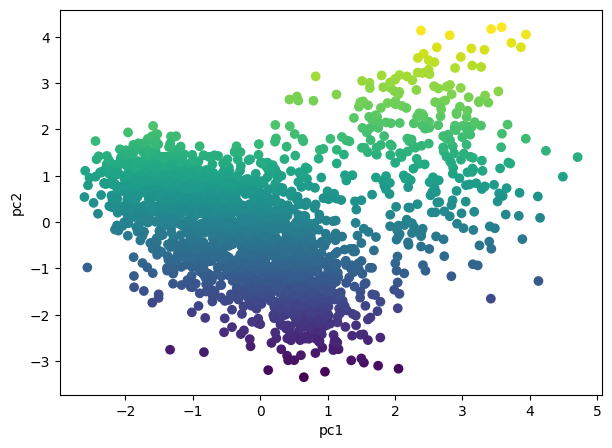

In [528]:
# Ploting top 2 pricipal components in graph.
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= principalComponents[:,1],cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')

[HP 1]
Did we lose information by picking only the top three principal components? How much information from the four columns in the filtered components are captured in the the two top principal components? Explain your answer briefly.

Here, the filtered dataset of mentioned 4 columns is considered to provide the answers. 

In [529]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1

In [530]:
print(type(pca_1.explained_variance_ratio_))
pca_1.explained_variance_ratio_

<class 'numpy.ndarray'>


array([0.41012618, 0.29530697, 0.214356  ])

In [531]:
ans_1 = 100*(pca_1.explained_variance_ratio_[0]+pca_1.explained_variance_ratio_[1])
ans = round(ans_1,2)
print("The total of {}% information from the four columns in the filtered components are captured in the two top principal components".format(ans))

The total of 70.54% information from the four columns in the filtered components are captured in the two top principal components


<your answer for HP 1 goes here>

Answer of HP 1:

*   Yes, we do loss some infromation by picking only top three principal components.

* By using .explain_variance_ratio_ we get the difference of variance of data contained in columns in the dataset.

* The total of 70.54% information from the four columns in the filtered components are captured in the two top principal components. [Here, 70.54% = 41% + 29.5%] As top two components has the 41% and 29.5% of total data.

[LP 3] Perform K-means clustering on the filtered dataset (before PCA) with k = 3 and plot the results using the first two principal components (after PCA). You may look at the class example for reference.

In [532]:
# Your code for LP3 goes here
# Feel free to add cells below this for LP3

In [533]:
updated_dataset


,duration,campaign,pdays,previous
0,-0.558430,2.092755,-0.417824,-0.289657
2,0.445224,-0.591522,1.433513,1.180002
3,-0.889264,0.750617,-0.417824,-0.289657
4,-0.045451,-0.591522,-0.417824,-0.289657
5,-0.246182,-0.255987,-0.417824,-0.289657
...,...,...,...,...
2241,-0.625340,0.750617,2.349120,5.099090
2242,-0.565864,-0.591522,-0.417824,-0.289657
2243,-0.287072,-0.255987,-0.417824,-0.289657
2244,-0.740574,-0.591522,-0.417824,-0.289657


In [534]:
from sklearn.cluster import KMeans

km_1 = KMeans(n_clusters=3, init='random', n_init=5, max_iter=50, random_state=0)   # For reproduciability, setting random state to 0.
y_km_1 = km_1.fit_predict(updated_dataset)

updated_dataset[y_km_1 == 0]


,duration,campaign,pdays,previous
2,0.445224,-0.591522,1.433513,1.180002
6,-0.759161,-0.591522,1.483821,0.200229
8,-0.428326,-0.255987,2.208257,0.200229
11,-0.543561,0.415082,1.141726,0.200229
33,-0.465499,-0.591522,2.610722,0.200229
...,...,...,...,...
2229,-0.606754,-0.591522,1.081357,0.200229
2230,-0.647643,-0.591522,2.339058,0.200229
2237,-0.316809,0.079547,3.043371,0.200229
2241,-0.625340,0.750617,2.349120,5.099090


In [535]:
pca_k = PCA(n_components=2)
x = updated_dataset
principalComponents = pca_k.fit_transform(x)
principalComponents.shape
print(principalComponents.shape ,principalComponents[:,0], principalComponents[:,1])

(2112, 2) [-1.05501693  2.06049468 -0.66788254 ... -0.32920362 -0.25349425
  2.91970776] [ 1.93852688 -0.03768902  0.76817715 ... -0.29538042 -0.50694893
  0.56346387]


In [536]:
print(y_km_1)

[1 0 2 ... 2 2 0]


Text(0, 0.5, 'principal_2')

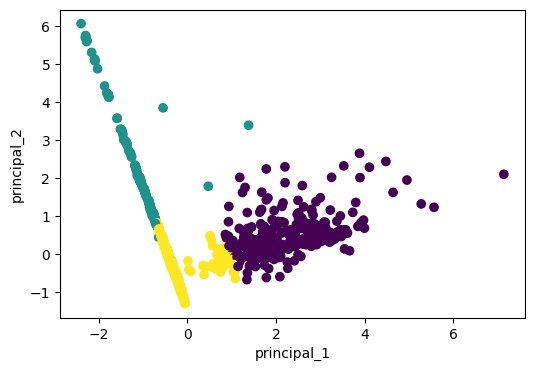

In [537]:
import matplotlib.pyplot as plt
# plt.grid(color='r')
plt.figure(figsize=(6,4))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=y_km_1, plotnonfinite = True,cmap='viridis') # using scatter plot
plt.xlabel('principal_1')
plt.ylabel('principal_2')

[HP 2] Use the elbow method to select the best value of k for this dataset and plot your results. What value of k is the appropriate number of clusters for this problem?

In [538]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2

< Your answer for HP2 goes here >

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

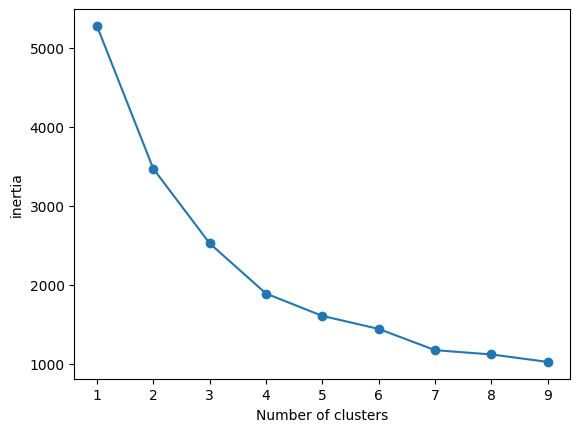

In [539]:
from sklearn.cluster import KMeans
l1 = []
for i in range(1, 10):
    km_l = KMeans(n_clusters=i, init='random', random_state=0)
    km_l.fit(x)
    l1.append(km_l.inertia_)

plt.plot(range(1, 10), l1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

Here, I have plot the ineria for all the 10 cycles.
By using inertia attribute, we can define the best number of appropriate culsters. This is elbow method.

As, the lower values of inertia are better and zero is optimal. here the best fir for clustering is == 4 clusters.

Text(0, 0.5, 'principal_2')

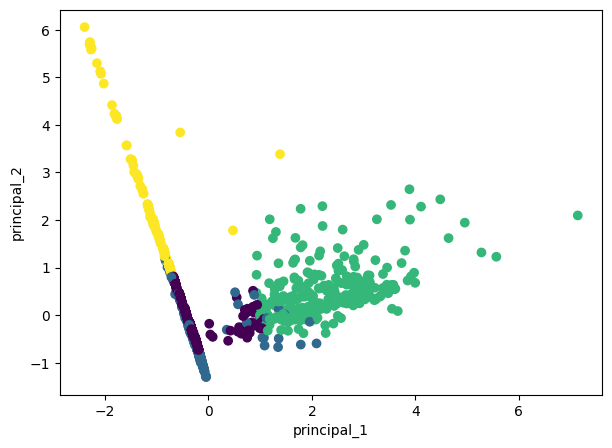

In [541]:
from sklearn.cluster import KMeans

km_final = KMeans(n_clusters=4, init='random', n_init=5, max_iter=100, random_state=0)

y_km_final = km_final.fit_predict(updated_dataset)

plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=y_km_final, plotnonfinite = True,cmap='viridis') # using scatter plot
plt.xlabel('principal_1')
plt.ylabel('principal_2')

# References
Include ALL your references here.

1) https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

2) https://matplotlib.org/stable/tutorials/introductory/pyplot.html

3) https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

4) https://www.youtube.com/watch?v=EItlUEPCIzM



# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository